In [1]:
# 利用VGG16 和图片增强 训练一个端到端的模型 对图像进行分类识别

In [2]:
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
import keras.optimizers as optimizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [4]:
model = models.Sequential()

In [5]:
model.add(conv_base)

In [6]:
model.add(layers.Flatten())

In [7]:
model.add(layers.Dense(512, activation='relu'))

In [8]:
model.add(layers.Dense(256, activation='relu'))

In [9]:
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 19,041,089
Trainable params: 19,041,089
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 编译和训练模型之前，一定要冻结卷积基，冻结一个或多隔层是指在训练过程中保持权重不变
conv_base.trainable = False

In [12]:
# 数据增强
train_dir = "./data/dogs-vs-cats/cats_and_dogs_small/train/"
validation_dir = "./data/dogs-vs-cats/cats_and_dogs_small/validation/"
test_dir = "./data/dogs-vs-cats/cats_and_dogs_small/test/"

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [16]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [17]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [18]:
model.compile(optimizer=optimizers.RMSprop(2e-5), loss='binary_crossentropy', metrics=['acc'])

In [19]:
model.fit_generator??

In [20]:
history = model.fit_generator(train_generator, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 18s 180ms/step - loss: 0.5853 - acc: 0.7010 - val_loss: 0.4319 - val_acc: 0.8290
Epoch 2/30
100/100 [==============================] - 17s 168ms/step - loss: 0.4641 - acc: 0.7940 - val_loss: 0.3452 - val_acc: 0.8640
Epoch 3/30
100/100 [==============================] - 16s 165ms/step - loss: 0.4089 - acc: 0.8260 - val_loss: 0.3106 - val_acc: 0.8720
Epoch 4/30
100/100 [==============================] - 17s 167ms/step - loss: 0.3768 - acc: 0.8310 - val_loss: 0.2906 - val_acc: 0.8810
Epoch 5/30
100/100 [==============================] - 16s 164ms/step - loss: 0.3706 - acc: 0.8405 - val_loss: 0.2846 - val_acc: 0.8820
Epoch 6/30
100/100 [==============================] - 16s 164ms/step - loss: 0.3547 - acc: 0.8400 - val_loss: 0.2708 - val_acc: 0.8880
Epoch 7/30
100/100 [==============================] - 16s 164ms/step - loss: 0.3348 - acc: 0.8485 - val_loss: 0.2579 - val_acc: 0.8980
Epoch 8/30
100/100 [==============================] - 1

In [21]:
val_loss = history.history['val_loss']
loss = history.history['loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

In [22]:
epochs = [i+1 for i in range(30)]

<Figure size 432x288 with 0 Axes>

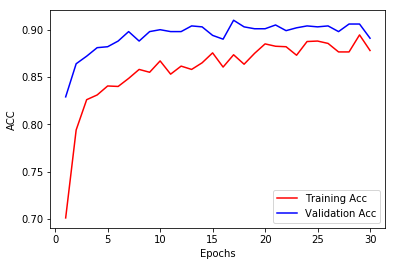

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(epochs, acc, color='r', label='Training Acc')
plt.plot(epochs, val_acc, color='b', label='Validation Acc')
plt.xlabel("Epochs")
plt.ylabel("ACC")
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

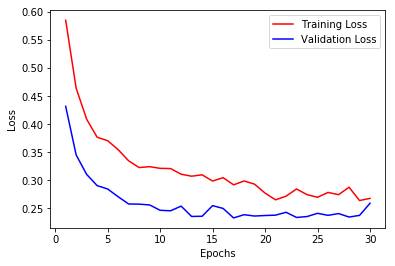

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(epochs, loss, color='r', label='Training Loss')
plt.plot(epochs, val_loss, color='b', label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.figure()

In [25]:
model.predict_generator(test_generator)

array([[2.71025729e-05],
       [7.31430948e-02],
       [8.65283251e-01],
       [9.96075690e-01],
       [9.91232336e-01],
       [9.99867558e-01],
       [4.07648087e-03],
       [9.95186031e-01],
       [4.08152133e-01],
       [8.09438468e-04],
       [1.18102145e-03],
       [9.98334229e-01],
       [5.21093428e-01],
       [8.40755254e-02],
       [5.86777460e-03],
       [7.65609264e-01],
       [9.99999881e-01],
       [9.98692095e-01],
       [2.70098776e-01],
       [2.31257435e-02],
       [3.07390612e-04],
       [9.37431585e-04],
       [9.99999285e-01],
       [1.58417702e-01],
       [7.03384355e-02],
       [8.68937877e-06],
       [9.95193303e-01],
       [7.84414820e-04],
       [3.58074494e-02],
       [9.38706636e-01],
       [9.99754965e-01],
       [4.31898190e-03],
       [2.12770188e-03],
       [5.41091204e-01],
       [3.73827497e-04],
       [1.03488490e-01],
       [1.10260658e-01],
       [1.20175242e-01],
       [1.48475626e-02],
       [3.14116865e-01],
